# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
api_key = weather_api_key
query_url = f"{url}appid={api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

#     Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()["weather"][0]["description"]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = requests.get(city_url).json()["coord"]["lat"]
        city_lng = requests.get(city_url).json()["coord"]["lon"]
        city_max_temp = requests.get(city_url).json()["main"]["temp_max"]
        city_humidity = requests.get(city_url).json()["main"]["humidity"]
        city_clouds = requests.get(city_url).json()["clouds"]["all"]
        city_wind = requests.get(city_url).json()["wind"]["speed"]
        city_country = requests.get(city_url).json()["sys"]["country"]
        city_date = requests.get(city_url).json()["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

      # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | kwinana
Processing Record 4 of Set 1 | guerrero negro
Processing Record 5 of Set 1 | tasiilaq
Processing Record 6 of Set 1 | alexandria
Processing Record 7 of Set 1 | amapa
Processing Record 8 of Set 1 | sitka
Processing Record 9 of Set 1 | castro
Processing Record 10 of Set 1 | prince rupert
Processing Record 11 of Set 1 | butembo
Processing Record 12 of Set 1 | abu dhabi
Processing Record 13 of Set 1 | torbay
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | chapais
Processing Record 16 of Set 1 | urambo
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | charlestown
Processing Record 22 of Set 1 | punta arenas
Processing Record 23 of Set 1 | alofi
Pr

Processing Record 37 of Set 4 | mahibadhoo
Processing Record 38 of Set 4 | kaspiyskiy
Processing Record 39 of Set 4 | gazni
City not found. Skipping...
Processing Record 40 of Set 4 | ellensburg
Processing Record 41 of Set 4 | forestville
Processing Record 42 of Set 4 | sobolevo
Processing Record 43 of Set 4 | kiskunlachaza
Processing Record 44 of Set 4 | puerto escondido
Processing Record 45 of Set 4 | half moon bay
Processing Record 46 of Set 4 | yaan
Processing Record 47 of Set 4 | casino
Processing Record 48 of Set 4 | champerico
Processing Record 49 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 0 of Set 5 | dubai
Processing Record 1 of Set 5 | sao filipe
Processing Record 2 of Set 5 | lalomanu
City not found. Skipping...
Processing Record 3 of Set 5 | klaksvik
Processing Record 4 of Set 5 | katsuura
Processing Record 5 of Set 5 | tecoanapa
Processing Record 6 of Set 5 | kamenskoye
City not found. Skipping...
Processing Record 7 of Set 5 | nalut
Processing Record 8 of Set 

Processing Record 25 of Set 8 | erzin
Processing Record 26 of Set 8 | newcastle
Processing Record 27 of Set 8 | yellandu
Processing Record 28 of Set 8 | libertador general san martin
Processing Record 29 of Set 8 | clinton
Processing Record 30 of Set 8 | sindor
Processing Record 31 of Set 8 | te anau
Processing Record 32 of Set 8 | seymchan
Processing Record 33 of Set 8 | hualmay
Processing Record 34 of Set 8 | santa fe
Processing Record 35 of Set 8 | manokwari
Processing Record 36 of Set 8 | lokosovo
Processing Record 37 of Set 8 | goderich
Processing Record 38 of Set 8 | clyde river
Processing Record 39 of Set 8 | hervey bay
Processing Record 40 of Set 8 | daru
Processing Record 41 of Set 8 | qaqortoq
Processing Record 42 of Set 8 | laguna de perlas
Processing Record 43 of Set 8 | palmer
Processing Record 44 of Set 8 | cuiaba
Processing Record 45 of Set 8 | tezpur
Processing Record 46 of Set 8 | conselheiro pena
Processing Record 47 of Set 8 | monte santo de minas
Processing Record 4

Processing Record 12 of Set 12 | djibo
Processing Record 13 of Set 12 | naryan-mar
Processing Record 14 of Set 12 | pucallpa
Processing Record 15 of Set 12 | bilibino
Processing Record 16 of Set 12 | sao goncalo do sapucai
Processing Record 17 of Set 12 | snyder
Processing Record 18 of Set 12 | shelburne
Processing Record 19 of Set 12 | whitehorse
Processing Record 20 of Set 12 | southbridge
Processing Record 21 of Set 12 | mishkino
Processing Record 22 of Set 12 | luwuk
Processing Record 23 of Set 12 | soubre
Processing Record 24 of Set 12 | bam
Processing Record 25 of Set 12 | kavieng
Processing Record 26 of Set 12 | sosnovo-ozerskoye
Processing Record 27 of Set 12 | aden
Processing Record 28 of Set 12 | kieta
Processing Record 29 of Set 12 | puerto madryn
Processing Record 30 of Set 12 | camopi
Processing Record 31 of Set 12 | pangai
Processing Record 32 of Set 12 | kupang
Processing Record 33 of Set 12 | hope mills
Processing Record 34 of Set 12 | santo angelo
Processing Record 35 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,14.81,58,75,6.69,AR,1675294462
1,bredasdorp,-34.5322,20.0403,19.25,73,98,1.69,ZA,1675294559
2,kwinana,-32.2500,115.7667,19.89,55,0,2.24,AU,1675294560
3,guerrero negro,27.9769,-114.0611,15.56,49,0,5.30,MX,1675294302
4,tasiilaq,65.6145,-37.6368,-7.91,75,100,12.96,GL,1675294562


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [2]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,14.81,58,75,6.69,AR,1675294462
1,bredasdorp,-34.5322,20.0403,19.25,73,98,1.69,ZA,1675294559
2,kwinana,-32.2500,115.7667,19.89,55,0,2.24,AU,1675294560
3,guerrero negro,27.9769,-114.0611,15.56,49,0,5.30,MX,1675294302
4,tasiilaq,65.6145,-37.6368,-7.91,75,100,12.96,GL,1675294562


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

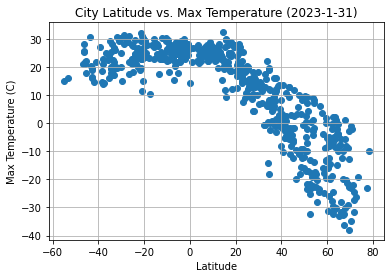

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Max Temperature (2023-1-31)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

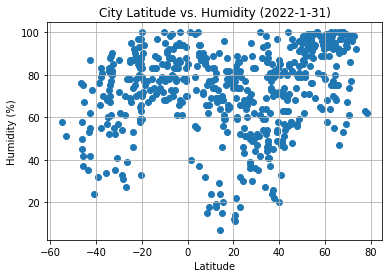

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2022-1-31)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

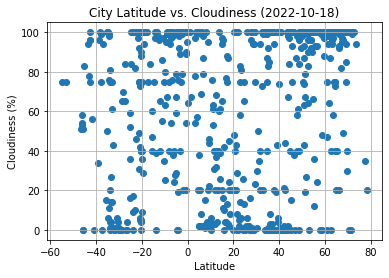

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2022-10-18)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

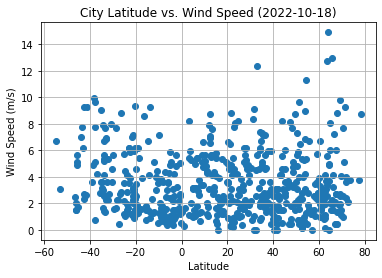

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2022-10-18)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [34]:
# Define a function to create Linear Regression plots
def linearregress(x_values, y_values, x_label, y_label):
    global rvalue
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    global line_eq
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel(x_label)
    plt.ylabel(y_label)

In [4]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,guerrero negro,27.9769,-114.0611,15.56,49,0,5.30,MX,1675294302
4,tasiilaq,65.6145,-37.6368,-7.91,75,100,12.96,GL,1675294562
5,alexandria,31.2156,29.9553,13.91,51,35,8.39,EG,1675294563
6,amapa,1.0000,-52.0000,21.60,100,100,0.28,BR,1675294565
7,sitka,57.0531,-135.3300,5.94,81,100,0.00,US,1675294352


In [5]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,14.81,58,75,6.69,AR,1675294462
1,bredasdorp,-34.5322,20.0403,19.25,73,98,1.69,ZA,1675294559
2,kwinana,-32.2500,115.7667,19.89,55,0,2.24,AU,1675294560
8,castro,-24.7911,-50.0119,18.04,95,100,1.03,BR,1675294277
13,atuona,-9.8000,-139.0333,25.93,77,80,7.15,PF,1675294472


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8691042435205282


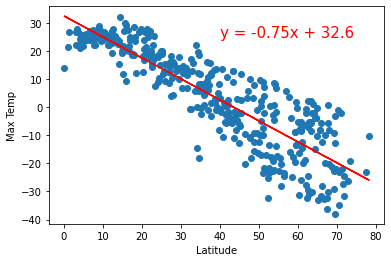

In [33]:
# Linear regression on Northern Hemisphere
linearregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temp")
    
# Make and format the chart
plt.annotate(line_eq,(40,25),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.36352369647122607


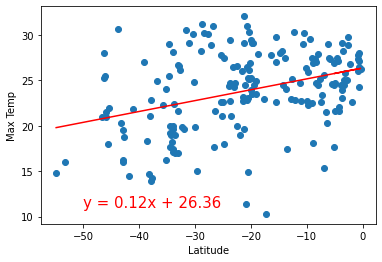

In [37]:
# Linear regression on Southern Hemisphere
linearregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temp")

# Make and format the chart
plt.annotate(line_eq,(-50,11),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** There appears to be a linear relationship between latitude and max temperature. As latitude gets higher, in the case of the northern hemisphere, temperature tends to get lower. In the case of the southern hemisphere, temperature tends to get lower as latitude gets lower. This makes sense as temperature tends to get colder as locations approach the poles. The linear relationship seems to be stronger in the northern hemisphere than the southern.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3940908751730478


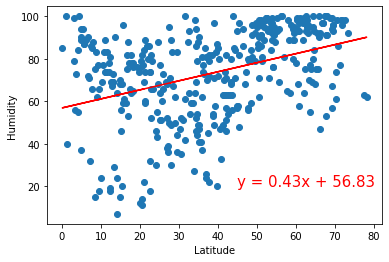

In [48]:
# Northern Hemisphere
linearregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity")

# Make and format the chart
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.49015831206564586


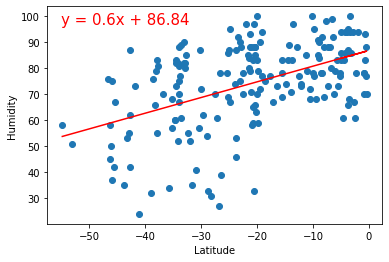

In [43]:
# Southern Hemisphere
linearregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity")

# Make and format the chart
plt.annotate(line_eq,(-55,97),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** There is a linear relationship between latitude and humidity, though it is not as strong as the relationship between latitude and temperature in the northern hemisphere. As one goes towards the poles, humidity tends to drop, though places like deserts can have low humidity and be cold, without necessarily having a low latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.3551071897354628


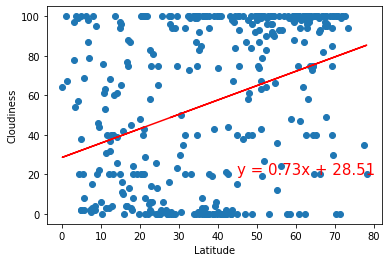

In [50]:
# Northern Hemisphere
linearregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness")

# Make and format the chart
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.23459973602799694


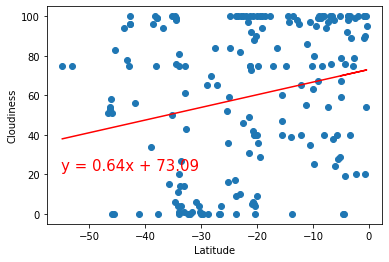

In [52]:
# Southern Hemisphere
linearregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness")

# Make and format the chart
plt.annotate(line_eq,(-55,22),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** There does not appear to be much of a linear relationship between cloudiness and latitude. This makes sense because cloudiness is more dependent on local weather conditions whether than if a city is close to the poles.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.003654749143321783


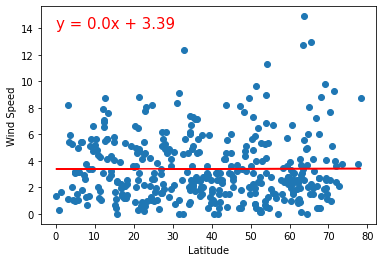

In [54]:
# Northern Hemisphere
linearregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed")

# Make and format the chart
plt.annotate(line_eq,(0,14),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.35188628865931193


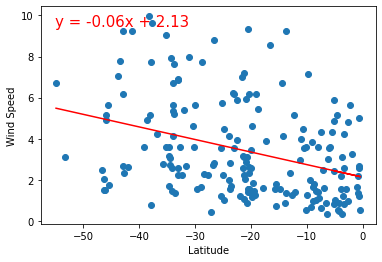

In [57]:
# Southern Hemisphere
linearregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed")

# Make and format the chart
plt.annotate(line_eq,(-55,9.5),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** Latitude does not appear to have much of a relationship with wind speed. Wind speed is more closely related to topography than closeness to the poles.